# Prose baseline

In [ ]:
from src.baseline import dummy_xml_strophe, get_shape_canticum, prose_strophe_sample, make_prose_baseline

make_prose_baseline("data/compiled/triads/ht_olympians_triads.xml", "ol01")


Assembling strophes...


100%|██████████| 13/13 [00:00<00:00, 75941.44it/s]


In [ ]:
from src.compile import process_file

process_file("data/scan/baselines/baseline_py04.xml", "data/compiled/baselines/baseline_py04.xml")

No bugs in responsion group 'ba01'. Good!

Processed XML saved to data/compiled/baseline_py04.xml


In [10]:
from src.stats_comp import compatibility_play, compatibility_ratios_to_stats

all_sets = compatibility_play('data/compiled/baseline_py04.xml')
total_comp = compatibility_ratios_to_stats(all_sets)
print(all_sets)

[[[0.7692307692307693, 0.6153846153846154, 0.6153846153846154, 0.5384615384615384, 0.5384615384615384, 0.6923076923076923, 0.6923076923076923, 0.7692307692307693, 0.6153846153846154, 0.7692307692307693, 0.7692307692307693], [0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 0.5384615384615384, 0.5384615384615384, 0.6923076923076923, 0.5384615384615384, 0.6923076923076923, 0.5384615384615384, 0.6153846153846154, 0.6153846153846154, 0.5384615384615384, 0.7692307692307693, 0.6153846153846154, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.6153846153846154, 0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.7692307692307693, 0.8461538461538461], [0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6923076923076923, 0.5384615384615384, 0.5384615384615384, 0.6923076923076923, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.6923076923076923, 0.6153846153846154, 0.7692307692307693, 0.6153846153846154, 0.61538461538

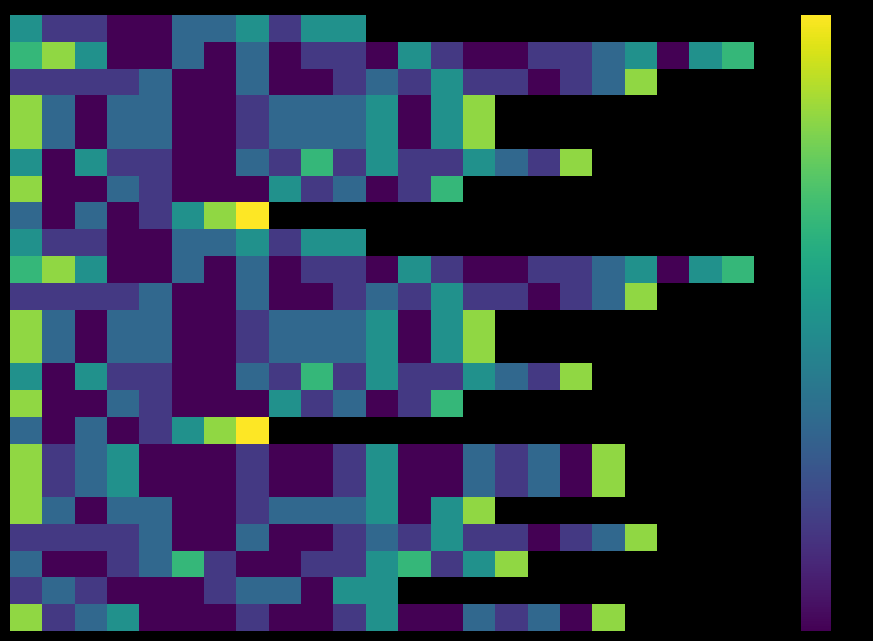

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = all_sets

# Unwrap nested tensor structure
data_matrix = data[0]

num_rows_data = len(data_matrix)
max_len_data = max(len(row) for row in data_matrix)

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# Plot heatmap (dark mode, no text overlay)
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True,
    vmax = 1
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# plt.xlabel("Metrical position (resolutions merged)")
# plt.ylabel("Line number (Snell-Maehler)")
# plt.title("Melodic-Comp. Heatmap of Pythia 4")
# plt.yticks(
#     ticks=np.arange(len(data_matrix)) + 0.5,
#     labels=np.arange(1, len(data_matrix)+1)
# )
ax.set_xticks([])
ax.set_yticks([])

#plt.savefig("media/plots/heatmap_notext_invertedcolours_pythia_4_comp_baseline.png", dpi=600)
plt.show()

In [10]:
from PIL import Image

png_files = [
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png",
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp_baseline.png"
]

frames = [Image.open(f).convert("P", palette=Image.ADAPTIVE, colors=256) for f in png_files]

frames[0].save(
    "baseline_animated_py04_PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,  # ms
    loop=0,
    optimize=False
)

# Lyric baseline

In [5]:
from lxml import etree

from src.baseline import lyric_line_sample

for i in range(3, 40):
    print(i)
    sample_line = lyric_line_sample(length=i, corpus_folder="data/compiled/triads", seed=1453)
    if sample_line:
        length = len(sample_line.xpath(".//syll[not(@resolution='True') and not(@anceps='True')]"))
        if length != i:
            print(f"\033[91mError: Expected length {i}, got {length}\033[0m")
        to_string = etree.tostring(sample_line, encoding='unicode', method='xml')
        print("\t" + to_string)

3
Searching for lines of length 3 in corpus at data/compiled/triads
Found 19 candidate lines of length 4, trimming last syllable.
	<l><syll weight="heavy">δω</syll><syll weight="heavy">ρή</syll><syll weight="light">σε</syll></l>
4
Searching for lines of length 4 in corpus at data/compiled/triads
	<l n="3" metre=""><syll weight="heavy">δω</syll><syll weight="heavy">ρή</syll><syll weight="light">σε</syll><syll weight="heavy">ται</syll></l>
          
5
Searching for lines of length 5 in corpus at data/compiled/triads


/var/folders/z5/96yps3t10c7c28x67t7n83d80000gn/T/ipykernel_33556/1220921757.py:8: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if sample_line:


	<l n="99" metre=""><syll weight="light">δρό</syll><syll weight="heavy">σῳ </syll><syll weight="heavy">μαλ</syll><syll weight="light">θα</syll><syll weight="heavy">κᾷ</syll></l>
          
6
Searching for lines of length 6 in corpus at data/compiled/triads
	<l n="8" metre=""><syll weight="heavy">τοι</syll><syll weight="heavy">οῖσ</syll><syll weight="light">δε </syll><syll weight="light">βέ</syll><syll weight="heavy">λεσ</syll><syll weight="heavy">σιν,</syll></l>
          
7
Searching for lines of length 7 in corpus at data/compiled/triads
	<l n="63" metre=""><syll weight="light">ὃ </syll><syll weight="heavy">καὶ </syll><syll weight="light">βα</syll><syll weight="heavy">ρει</syll><syll weight="heavy">ᾶν </syll><syll weight="light">νό</syll><syll weight="heavy">σων</syll></l>
          
8
Searching for lines of length 8 in corpus at data/compiled/triads
	<l n="76" metre=""><syll weight="heavy">ἀμ</syll><syll weight="light">φέ</syll><syll weight="heavy">πει </syll><syll weight="heavy">κλ

SyntaxError: invalid predicate (<string>)